In [1]:
#### Prblm statement-->> predict the total number of confirmed cases

In [6]:
#!pip install pystan
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=521347 sha256=0b57e4cff6e49284056e869dce7795bb4a3de7f173ef69dbb89653c635aa2d44
  Stored in directory: c:\users\kiit\appdata\local\pip\cache\wheels\cd\a1\12\db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [8]:
import fbprophet

In [9]:
from fbprophet import Prophet

In [10]:
### to check all the function & modules inside Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [11]:
import pandas as pd

In [12]:
df=pd.read_csv(r'covid_19_clean_complete.csv')

In [13]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [14]:
df.shape

(49068, 10)

In [15]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [16]:
df['Date']=pd.to_datetime(df['Date'])

In [17]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [18]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [19]:
df['Date'].nunique()

188

In [20]:
total=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [21]:
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [22]:
df_prophet=total.rename(columns={'Date':'ds','Confirmed':'y'})

In [23]:
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [24]:
m=Prophet(yearly_seasonality=True,daily_seasonality=True)

In [25]:
model=m.fit(df_prophet)

In [26]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('daily',
              {'period': 1,
               'fourier_order': 4,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [27]:
### ### now I am going to do forecasting so to do forecasting I need some Future Days 
future_global=model.make_future_dataframe(periods=30,freq='D')

In [28]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [29]:
df_prophet.shape

(188, 5)

In [30]:
future_global.shape

(218, 1)

In [31]:
df_prophet['ds'].tail()

183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
Name: ds, dtype: datetime64[ns]

In [32]:
future_global.tail()

,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


In [33]:
### now do Prediction on future_global
prediction=model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-7.018962e+05,-1.802415e+04,4.250968e+03,-7.018962e+05,-7.018962e+05,6.954249e+05,6.954249e+05,6.954249e+05,-2.812650e+06,...,-6369.606926,-6369.606926,-6369.606926,3.514445e+06,3.514445e+06,3.514445e+06,0.0,0.0,0.0,-6.471259e+03
1,2020-01-23,-6.179622e+05,-9.319899e+03,1.255686e+04,-6.179622e+05,-6.179622e+05,6.198606e+05,6.198606e+05,6.198606e+05,-2.812650e+06,...,1142.048105,1142.048105,1142.048105,3.431369e+06,3.431369e+06,3.431369e+06,0.0,0.0,0.0,1.898345e+03
2,2020-01-24,-5.340283e+05,-1.712294e+03,2.172911e+04,-5.340283e+05,-5.340283e+05,5.438221e+05,5.438221e+05,5.438221e+05,-2.812650e+06,...,8854.537859,8854.537859,8854.537859,3.347618e+06,3.347618e+06,3.347618e+06,0.0,0.0,0.0,9.793832e+03
3,2020-01-25,-4.500943e+05,8.801338e+02,2.371963e+04,-4.500943e+05,-4.500943e+05,4.624646e+05,4.624646e+05,4.624646e+05,-2.812650e+06,...,11388.548585,11388.548585,11388.548585,3.263727e+06,3.263727e+06,3.263727e+06,0.0,0.0,0.0,1.237031e+04
4,2020-01-26,-3.661604e+05,-6.070317e+03,1.670588e+04,-3.661604e+05,-3.661604e+05,3.706590e+05,3.706590e+05,3.706590e+05,-2.812650e+06,...,3221.351425,3221.351425,3221.351425,3.180088e+06,3.180088e+06,3.180088e+06,0.0,0.0,0.0,4.498576e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,1.877123e+07,1.491473e+07,1.503690e+07,1.871270e+07,1.883774e+07,-3.798605e+06,-3.798605e+06,-3.798605e+06,-2.812650e+06,...,11388.548585,11388.548585,11388.548585,-9.973433e+05,-9.973433e+05,-9.973433e+05,0.0,0.0,0.0,1.497262e+07
214,2020-08-23,1.886570e+07,1.442885e+07,1.456083e+07,1.880397e+07,1.893672e+07,-4.373363e+06,-4.373363e+06,-4.373363e+06,-2.812650e+06,...,3221.351425,3221.351425,3221.351425,-1.563934e+06,-1.563934e+06,-1.563934e+06,0.0,0.0,0.0,1.449233e+07
215,2020-08-24,1.896016e+07,1.393789e+07,1.407761e+07,1.889545e+07,1.903416e+07,-4.955856e+06,-4.955856e+06,-4.955856e+06,-2.812650e+06,...,-8379.505267,-8379.505267,-8379.505267,-2.134826e+06,-2.134826e+06,-2.134826e+06,0.0,0.0,0.0,1.400430e+07
216,2020-08-25,1.905463e+07,1.346011e+07,1.360558e+07,1.898756e+07,1.913099e+07,-5.525326e+06,-5.525326e+06,-5.525326e+06,-2.812650e+06,...,-9857.373781,-9857.373781,-9857.373781,-2.702818e+06,-2.702818e+06,-2.702818e+06,0.0,0.0,0.0,1.352930e+07


In [34]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,1.497262e+07,1.491473e+07,1.503690e+07
214,2020-08-23,1.449233e+07,1.442885e+07,1.456083e+07
215,2020-08-24,1.400430e+07,1.393789e+07,1.407761e+07
216,2020-08-25,1.352930e+07,1.346011e+07,1.360558e+07
217,2020-08-26,1.306971e+07,1.299731e+07,1.315145e+07


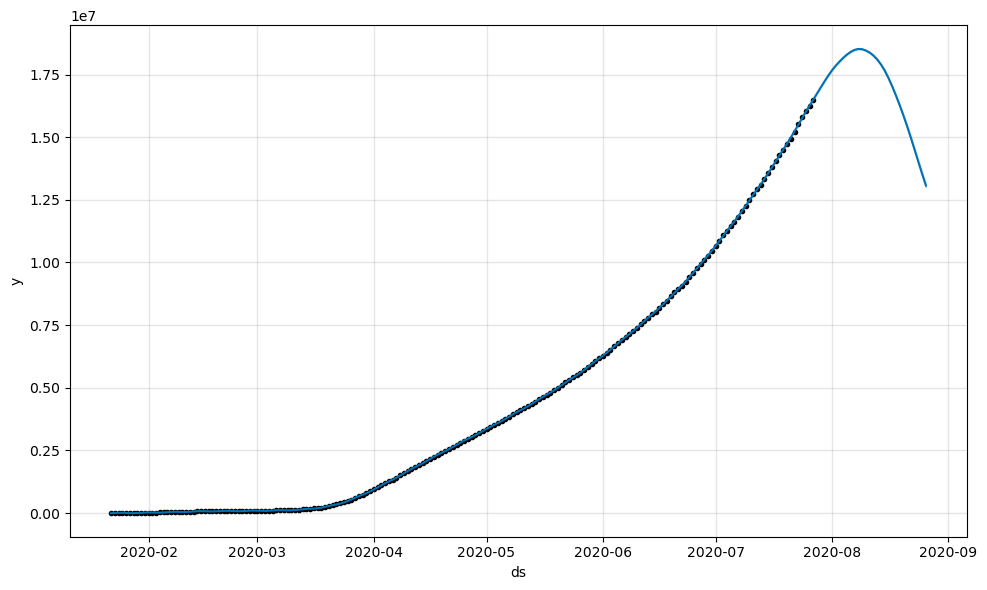

In [35]:
#### plot the predictions u will see these are with respect to yhat
model.plot(prediction)

### Conclusion--> This is what our prediction looks like. The direction of overall case numbers is probably true, u will observe how cases rises exponentially

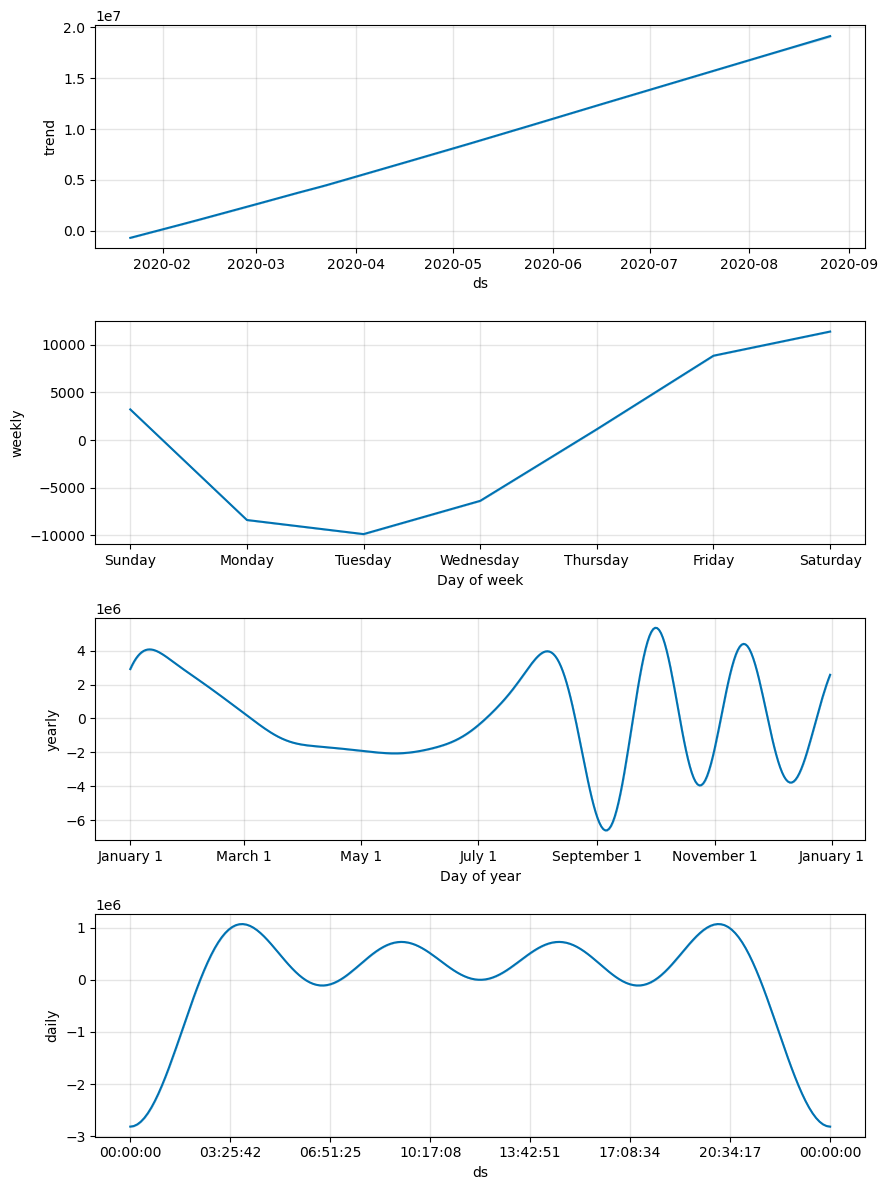

In [36]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)

In [37]:
#### The prophet model identifies points at which the trend changes and those can be plotted.¶
from fbprophet.plot import add_changepoints_to_plot

In [38]:
fig=model.plot(prediction)

a=add_changepoints_to_plot(fig.gca(),model,prediction)

In [39]:
from fbprophet.diagnostics import cross_validation

In [40]:
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')
## horizon='365 days'--> for how many days we have to cross validate=====

## Computes forecasts from historical cutoff points Beginning from..

## (end - horizon) it means it is going to take that date that is (end - horizon) bcz on these date we have to just 
## cross-validate for the new dataset that we have to find out

## period=180 as from documentation of func as period=0.5*365=180 or {period=1/2*horizon value}
## initial -How many total no. of days we actually want-- 3*365 from documentation of function or  {initial=3*horizon}

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [41]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.180573e+06,3.176535e+06,3.184595e+06,3185195,2020-04-28
1,2020-04-30,3.253741e+06,3.249794e+06,3.257870e+06,3268876,2020-04-28
2,2020-05-01,3.322668e+06,3.318538e+06,3.327191e+06,3355922,2020-04-28
3,2020-05-02,3.384776e+06,3.380105e+06,3.389606e+06,3437608,2020-04-28
4,2020-05-03,3.442155e+06,3.437477e+06,3.447522e+06,3515244,2020-04-28


In [42]:
df_cv.shape

(150, 6)

#### Obtaining the Performance Metrics
    We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.


In [52]:
from fbprophet.diagnostics import performance_metrics

In [53]:
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.093346e+09,45753.101434,36431.052452,0.006139,0.004630,0.0
1,4 days,3.785481e+09,61526.263689,52525.584806,0.009072,0.006551,0.0
2,5 days,6.628901e+09,81418.062139,68935.986428,0.012149,0.010795,0.0
3,6 days,1.151473e+10,107306.692579,88868.560955,0.015789,0.015369,0.0
4,7 days,2.085000e+10,144395.292665,119909.833699,0.020979,0.020792,0.0


In [54]:
from fbprophet.plot import plot_cross_validation_metric

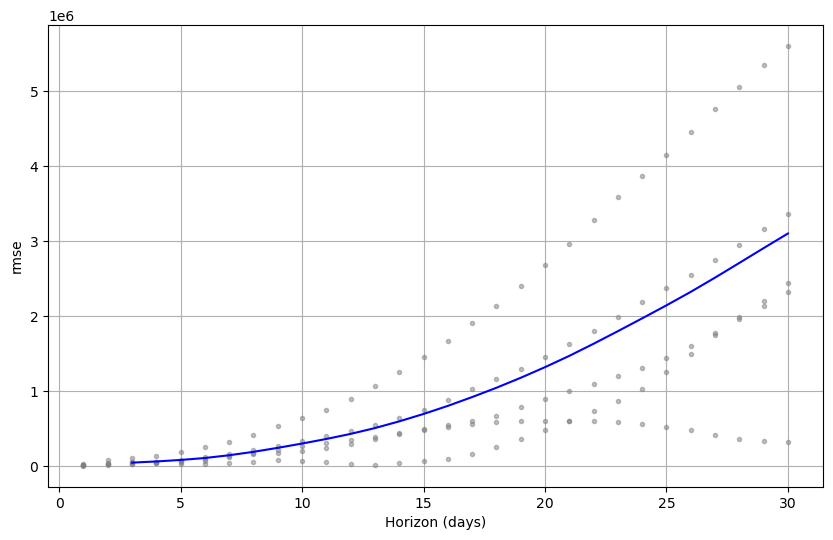

In [55]:
df_performance=plot_cross_validation_metric(df_cv,metric='rmse')
df_performance

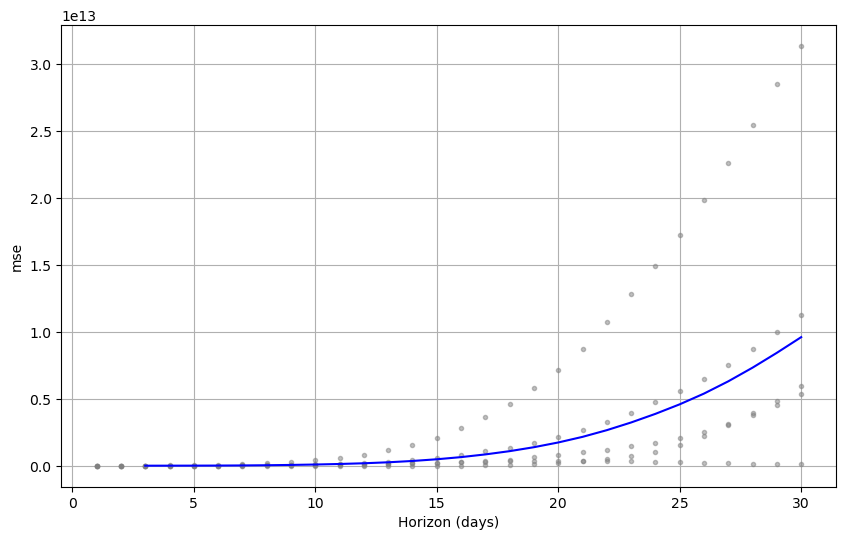

In [56]:
df_performance=plot_cross_validation_metric(df_cv,metric='mse')
df_performance

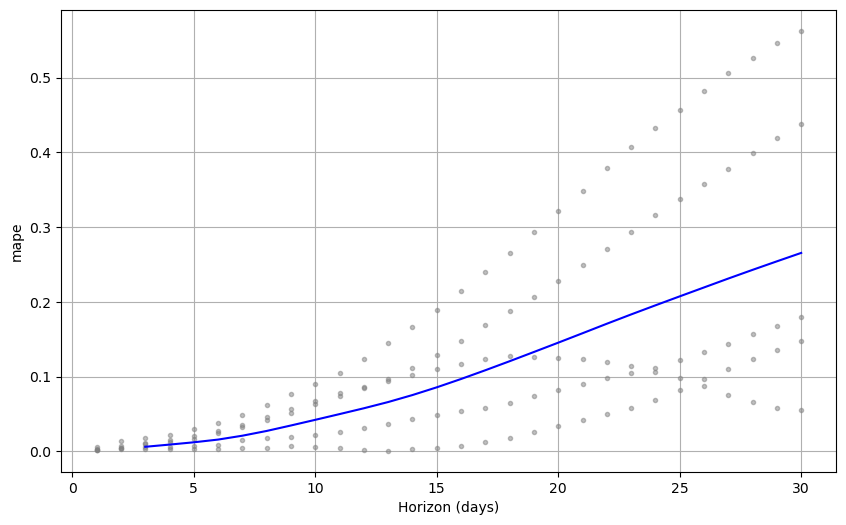

In [57]:
df_performance=plot_cross_validation_metric(df_cv,metric='mape')
df_performance